<a href="https://colab.research.google.com/github/VeroFrias93/TOPICO-DE-LA-INDUSTRIA-1/blob/main/Copia_de_PRACTICA_2_VERONICA_FRIAS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Veronica Marisela Frias Peralta
**e-mail:** veronica.frias6148@alumnos.udg.mx

## MODULES

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

##CLASSES

In [ ]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

Actividad 1: Lévy distribution - N Curves (3 pts)


*   Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.

* Visualizar con plotly.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [ ]:
from ast import List
std_motion_steps = 3.0
Levy_exponents = [0.1, 0.5, 1.0, 1.9]
beta = 0
n_steps = 1000
Levy_pdf = list()

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, n_steps)
for i in range(len(Levy_exponents)):
  Levy_pdf.append(np.array([levy_stable.pdf(j, alpha=Levy_exponents[i], beta=beta, loc=std_motion_steps) for j in aux_domain]))

In [ ]:
fig_Levy_pdf = go.Figure()
for m in range(len(Levy_pdf)):

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y = Levy_pdf[m],
                                    marker = dict(size=2),
                                    line = dict(width=2),
                                    mode ="lines",
                                    name = "Levy_{}". format(Levy_exponents[m]),
                                    showlegend = True
                                    ))

fig_Levy_pdf.show()


In [ ]:
Levy_exponent = 0.5
betas = [0, 0.25, 0.5, 0.75]
Levy_pdf2 = list()

aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, n_steps)
for i in range(len(Levy_exponents)):
  Levy_pdf2.append(np.array([levy_stable.pdf(j, alpha=Levy_exponent, beta=betas[i], loc=std_motion_steps) for j in aux_domain]))

In [ ]:
fig_Levy_pdf = go.Figure()
for m in range (len(Levy_pdf)):

  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y= Levy_pdf2[m],
                                    marker = dict(size=2),
                                    line = dict(width=2),
                                    mode = "lines",
                                    name = "Levy_{}". format(Levy_exponents[m]),
                                    showlegend =True
                                    ))


fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.


[ 6.74882846e-01  4.41393773e+00  3.35460534e+00  4.42122269e+00
  4.45571213e+00  6.22639165e+00  1.57420949e+00  3.70233472e+00
  4.35052299e+00  1.44223798e+00  2.59475124e+00  2.80041276e+00
  3.21415995e+00  1.17488972e+00  2.77464411e+00  4.14171783e+00
  6.75981169e+00  2.21514753e+00  5.95002190e+00  5.12474863e+00
  3.46907993e+00  2.78200996e+00 -7.82198927e-02  5.14811346e+00
  2.96251023e+00  2.89447474e+00  2.43414746e+00  3.07475472e+00
  4.12790506e-01  2.97800535e+00  5.97897598e-01  3.62863464e+00
  4.64001664e+00  2.67922842e+00  4.34926763e+00  2.56493491e+00
  2.38686059e+00  4.62105872e+00  1.15897651e+00  1.69198457e+00
  4.87813027e+00  5.58785903e+00  1.35043838e+00  2.15145471e+00
  1.72116501e-01  2.77927347e+00  2.97913668e+00  2.99337249e+00
  3.01724754e+00  2.64134643e+00  3.06385651e+00  2.96976109e+00
  9.69343061e-01  1.80962208e+00  3.79817193e+00  2.35627572e+00
  5.01800746e+00  4.37687814e+00  2.28093918e+00  1.83775909e+00
  4.27464408e+00  2.10014

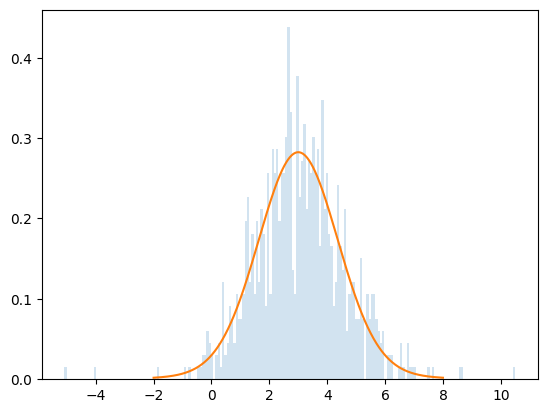

In [ ]:
Levy_rvs = levy_stable.rvs(Levy_exponents[3], beta, loc=std_motion_steps, size=850)

plt.hist(Levy_rvs, bins=200, density=True, histtype="stepfilled", alpha=0.2, label="Levy walk histoi")
plt.plot(aux_domain, Levy_pdf[3])

print(Levy_rvs)

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [ ]:
# Init variables
CRW_exponent_ = 0.7
n_steps_l = 850
s_pos_l = [0, 0]
#speed_l = 3

wrapcauchy_rvs_ = wrapcauchy.rvs(c=CRW_exponent_, loc=0, size=n_steps_l)
wrapcauchy_rvs_sum = wrapcauchy_rvs_
for n in range(len(wrapcauchy_rvs_)):
  for m in range(n):
    wrapcauchy_rvs_sum[n] += wrapcauchy_rvs_[m]

Levy_rvs_abs = abs(Levy_rvs)

#print(wrapcauchy_rvs_)
#print(wrapcauchy_rvs_sum)
# Init dataframe
BM_2d_df_l = pd.DataFrame(columns=['x_pos', 'y_pos'])

# Auxiliar para concatenar
temp_df_l = pd.DataFrame([{'x_pos': s_pos_l[0], 'y_pos': s_pos_l[1]}])

BM_2d_df_l = pd.concat([BM_2d_df_l, temp_df_l], ignore_index=True)

for i in range(n_steps_l-1):
  # Init velocity vector
  velocity_l = Vec2d(Levy_rvs_abs[i],0)
  velocity_l = velocity_l.rotated(wrapcauchy_rvs_[i])

  temp_df_l = pd.DataFrame([{'x_pos': BM_2d_df_l.x_pos[i] + velocity_l.x, 'y_pos': BM_2d_df_l.y_pos[i] + velocity_l.y}])
  BM_2d_df_l = pd.concat([BM_2d_df_l, temp_df_l], ignore_index=True)





In [ ]:
# Time aux vector
times_l = np.linspace(0,1, n_steps)

#Init figure
fig_BM_3d_l = go. Figure()

# Plot
fig_BM_3d_l.add_trace(go.Scatter3d(x = BM_2d_df_l['x_pos'],
                                 y = BM_2d_df_l['y_pos'],
                                 z = times_l,
                                 marker = dict(size=2),
                                 line = dict(width=2),
                                 mode = 'lines',
                                 name = 'BM_2d with Levy',
                                 showlegend = True
                                 ))

# Figure parameters -- update layoud
fig_BM_3d_l.layout.update(title_text = 'BM trajectory in 3D',
                        autosize = False,
                        width = 900,
                        height = 900,
                        scene_camera=dict(
                            up=dict(x=0, y=1, z=0),
                            center=dict(x=0, y=0, z=0),
                            eye=dict(x=0, y=0, z=1),
                        ),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='z_pos (mm)')
                        ))

fig_BM_3d_l.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.